# BioImageIO Crowd Sourcing Demo

This notebook runs a BioEngine server equipped with Kaibu, an interactive image annotation tool in the browser. It allows the annotation of images in a collaborative manner.

As a demo, we will collect image annotations from the participants and train a CellPose model using dose.
Most of the notebook is based on the original [CellPose notebook](https://github.com/mouseland/cellpose)

# 0. Setup

We will first install all the dependencies required for Kaibu, ImJoy and cellpose 2.0, check the GPU is working, and mount google drive to get your models and images.

### 0.1 Installation
Install cellpose -- by default the torch GPU version is installed in COLAB notebook.

Please, restart the session afetr installing the requirements.

In [ ]:
## Install required dependencies
!git clone https://github.com/bioimage-io/bioimageio-colab.git
## Checkout to the desired branch
import os
os.chdir("/content/bioimageio-colab/")
!pip install -r "requirements.txt"
!pip install -e .

### 0.2 Mount google drive

Please mount your google drive and find your working folder with (if available) the model that you trained. If you want to train a model, create a folder in google drive with the images and the labels, either `_seg.npy` files from the cellpose gui, or `_masks.tif` files.

In [ ]:
## Run this cell to connect your Google Drive to Colab
from google.colab import drive
drive.mount('/content/gdrive')

# 1. Launch the BioEngine for Collaborative annotations

## 1.1 Setup corresponding paths

In [4]:
path2data = "/content/data"
outpath = "/content/kaibu_annotations"

## Example dataset
data_url = "https://github.com/bioimage-io/bioimageio-colab/releases/download/v0.1/hpa-dataset-v2-98-rgb.zip"

## 1.2 Launch the BioEngine server with Kaibu
This cell will output a shareable link that you can use to open the annotation tool in the browser. 

In [5]:
from bioimageio_colab.annotation_server import start_server

await start_server(data_url, path2data, outpath)

--------------------------------------------------------------------------------
Annotation server is running at:
https://imjoy.io/lite?plugin=https://raw.githubusercontent.com/bioimage-io/bioimageio-colab/annotation-server/plugins/bioimageio-colab.imjoy.html&config=%7B%22service_id%22%3A%20%22bdYRB3SQuWdF3chocpmE8n/VvwAsuKJP6LTxNjgjPQ22a%3Abioimageio-colab%22%2C%20%22server_url%22%3A%20%22https%3A//ai.imjoy.io%22%7D
--------------------------------------------------------------------------------
To download the annotated labels, go to:
https://ai.imjoy.io/bdYRB3SQuWdF3chocpmE8n/services/bioimageio-colab/download_labels
--------------------------------------------------------------------------------


## Display manual annotations

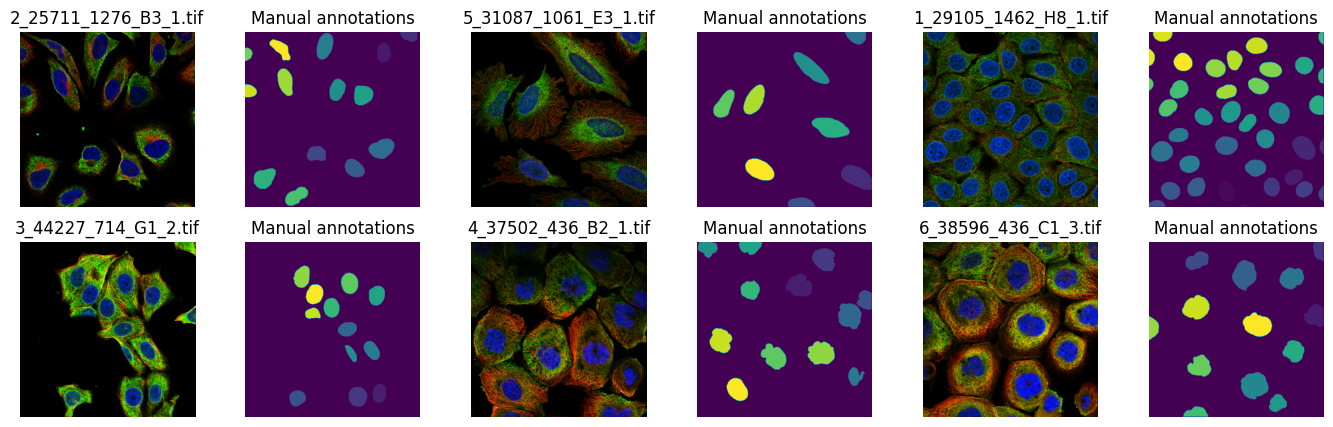

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread

path2label = os.path.join(outpath, "labels")
path2source = os.path.join(outpath, "source")
annotations = [f for f in os.listdir(path2source) if f.endswith(".tif")]

if len(annotations)<6:
    #plot one single annotation starting from k
    k=0
    plt.figure(figsize=(10,20))
    plt.subplot(1,2,1)
    plt.imshow(imread(os.path.join(path2source, annotations[k])))
    plt.title(f"{annotations[k]}")
    plt.subplot(1,2,2)
    plt.imshow(imread(os.path.join(path2label, annotations[k])))
    plt.title("Manual annotations")
    plt.show()
else:
    # plot several random annotations
    choices = np.random.choice(len(annotations), 6, replace=False)
    plt.figure(figsize=(17,5))
    for i in range(6):    
        plt.subplot(2,6,2*(i+1)-1)
        plt.imshow(imread(os.path.join(path2source, annotations[choices[i]])))
        plt.axis('off')
        plt.title(f"{annotations[choices[i]]}")
        plt.subplot(2,6,2*(i+1))
        plt.imshow(imread(os.path.join(path2label, annotations[choices[i]])))
        plt.axis('off')
        plt.title("Manual annotations")
    plt.show()
